In [1]:
import mxnet as mx
import numpy as np
import gluoncv as gcv
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

from mxnet import nd, image
from mxnet.gluon.data.vision import transforms
from gluoncv.model_zoo import get_model
from gluoncv.utils import viz, download

C:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
path = 'test2.jpg'

In [3]:
x, img = gcv.data.transforms.presets.ssd.load_test(path, short=512)

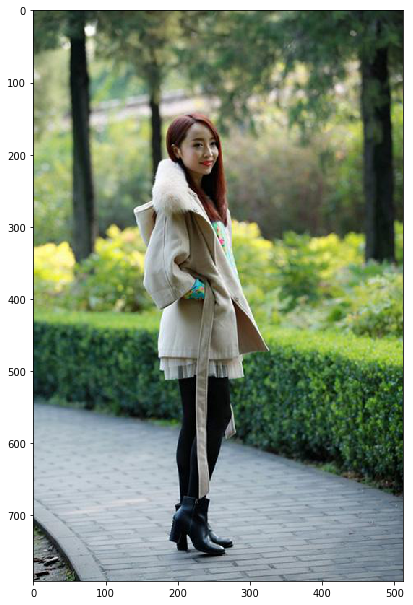

In [4]:
viz.plot_image(img)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

In [5]:
BATCH_SIZE = 256
EMBEDDING_SIZE = 512
SIZE = (224, 224)
MEAN_IMAGE= mx.nd.array([0.485, 0.456, 0.406])
STD_IMAGE = mx.nd.array([0.229, 0.224, 0.225])

In [6]:
def transform(image, label):
    resized = mx.image.resize_short(image, SIZE[0]).astype('float32')
    cropped, crop_info = mx.image.center_crop(resized, SIZE)
    cropped /= 255.
    normalized = mx.image.color_normalize(cropped,
                                      mean=MEAN_IMAGE,
                                      std=STD_IMAGE) 
    transposed = nd.transpose(normalized, (2,0,1))
    return transposed, label

In [7]:
image = plt.imread(path)[:,:,:3]
image_t, _ = transform(nd.array(image), 1)
output = net(image_t.expand_dims(axis=0).as_in_context(ctx))
labels, distances = p.knn_query([output.asnumpy().reshape(-1,)], k = 6)
images = [image]
images += [plt.imread(dataset.items[label][0]) for label in labels[0][1:]]

NameError: name 'net' is not defined

In [ ]:
plot_predictions(images)

In [ ]:
ctx = mx.gpu() if len(mx.test_utils.list_gpus()) else mx.cpu()

In [ ]:
ssdnet =  get_model('ssd_512_resnet50_v1_coco', pretrained=True, ctx=ctx)

In [ ]:
classes, scores, bbox = ssdnet(x.as_in_context(ctx))

In [ ]:
viz.plot_bbox(img, bbox[0], scores[0], classes[0], class_names=ssdnet.classes)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

In [ ]:
ssdnet.classes

In [ ]:
bbout = None
for i, (c, s, bb) in enumerate(zip(classes[0].asnumpy(), scores[0].asnumpy(), bbox[0].asnumpy())):
    if c == 0 and s > 0.5:
        bbout = bb
        break
assert bbout is not None

In [ ]:
diff_x = int(max((bbout[3]-bbout[1])-(bbout[2]-bbout[0]), 0)/2)
diff_y = int(max(-(bbout[3]-bbout[1])+(bbout[2]-bbout[0]), 0)/2)
x0 = max(int(bbout[0])-diff_x, 0)
x1 = min(int(bbout[2])+diff_x, img.shape[1])
y0 = max(int(bbout[1])-diff_y, 0)
y1 = min(int(bbout[3])+diff_y, img.shape[0])
cropped_img = img[y0:y1, x0:x1, :]

In [ ]:
cropped_img = img[y0:y1, x0:x1, :]

In [ ]:
img.shape

In [ ]:
viz.plot_image(cropped_img)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()